### XGboost Model - Fraud Detection 

In [1]:
import pandas as pd

df = pd.read_csv("fraud_eda.csv")

# Separating features by type
categorical_cols = ['customer','age','gender','zipcodeOri',
                    'merchant','zipMerchant','category',
                    'time_of_day','gender_new']
numeric_cols = ['step','amount','fraud','day','hour','Enterprise']

In [2]:
# Cleaning categorical values
for c in categorical_cols:
    df[c] = df[c].astype(str).str.strip().str.replace("'", "", regex=False)

In [3]:
# Count missing data per column
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

Series([], dtype: int64)


In [4]:
df.nunique()

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
day                8
hour              24
time_of_day        8
gender_new         3
Enterprise         2
dtype: int64

In [5]:
# Dropping unneeded columns
df = df.drop(columns=['hour', 'day', 'step', 'time_of_day','zipMerchant', 'zipcodeOri', 'customer','gender'])

In [6]:
df.shape[1]

7

### One-hot encode 'age', 'Gender', 'merchant', 'category'

In [7]:
# One-hot encode 'age'
df = pd.get_dummies(df, columns=['age'], prefix='AGE')
print(df.head())

      merchant           category  amount  fraud gender_new  Enterprise  \
0   M348934600  es_transportation    4.55      0          M           0   
1   M348934600  es_transportation   39.68      0          M           0   
2  M1823072687  es_transportation   26.89      0          F           0   
3   M348934600  es_transportation   17.25      0          M           0   
4   M348934600  es_transportation   35.72      0          M           0   

   AGE_0  AGE_1  AGE_2  AGE_3  AGE_4  AGE_5  AGE_6  AGE_U  
0  False  False  False  False   True  False  False  False  
1  False  False   True  False  False  False  False  False  
2  False  False  False  False   True  False  False  False  
3  False  False  False   True  False  False  False  False  
4  False  False  False  False  False   True  False  False  


In [8]:
df = pd.get_dummies(df, columns=['merchant'], prefix='MERCHANT')

In [9]:
df = pd.get_dummies(df, columns=['category'], prefix='MCC')

In [10]:
df = pd.get_dummies(df, columns=['gender_new'], prefix='GENDER')

In [11]:
#df = pd.get_dummies(df, columns=['time_of_day'], prefix='TOD')

In [12]:
print(df.head())

   amount  fraud  Enterprise  AGE_0  AGE_1  AGE_2  AGE_3  AGE_4  AGE_5  AGE_6  \
0    4.55      0           0  False  False  False  False   True  False  False   
1   39.68      0           0  False  False   True  False  False  False  False   
2   26.89      0           0  False  False  False  False   True  False  False   
3   17.25      0           0  False  False  False   True  False  False  False   
4   35.72      0           0  False  False  False  False  False   True  False   

   ...  MCC_es_leisure  MCC_es_otherservices  MCC_es_sportsandtoys  \
0  ...           False                 False                 False   
1  ...           False                 False                 False   
2  ...           False                 False                 False   
3  ...           False                 False                 False   
4  ...           False                 False                 False   

   MCC_es_tech  MCC_es_transportation  MCC_es_travel  \
0        False                   Tru

### Scaling Numerical Variables (Amount)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['amount_scaled'] = scaler.fit_transform(df[['amount']])

# dropping amount column
df.drop(columns=['amount'], inplace=True)


In [14]:
df.head()

,fraud,Enterprise,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_U,...,MCC_es_otherservices,MCC_es_sportsandtoys,MCC_es_tech,MCC_es_transportation,MCC_es_travel,MCC_es_wellnessandbeauty,GENDER_F,GENDER_M,GENDER_U,amount_scaled
0,0,0,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,-0.299276
1,0,0,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0.016067
2,0,0,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,-0.098742
3,0,0,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,-0.185275
4,0,0,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,-0.019480


### Heatmap - Correlation Matrix

fraud            1.000000
amount_scaled    0.489967
Enterprise      -0.002512
Name: fraud, dtype: float64


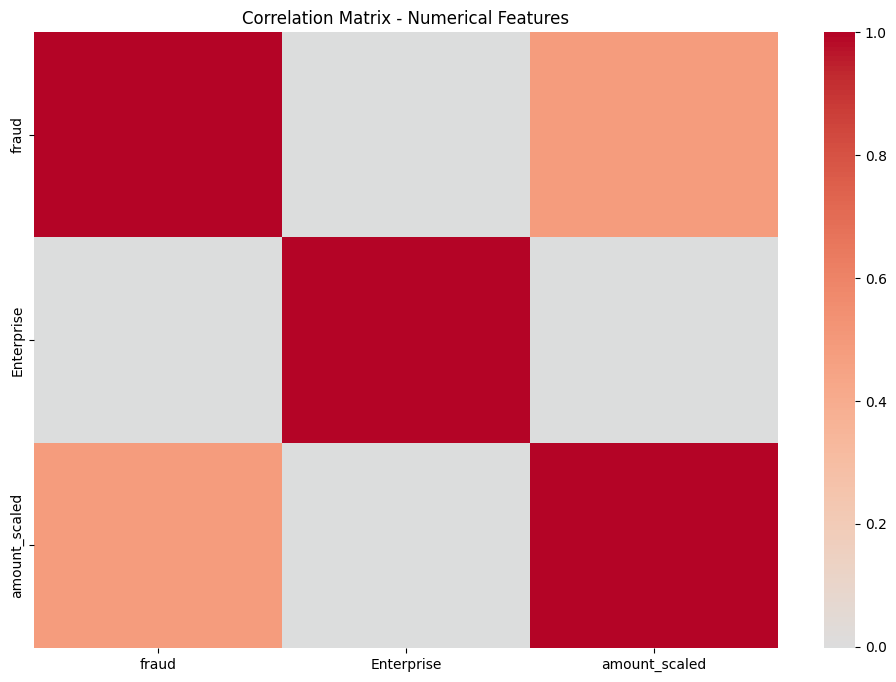

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# only numerical columns
num_df = df.select_dtypes(include=['int64','float64','int32'])

# Correlation matrix
corr = num_df.corr()
print(corr['fraud'].sort_values(ascending=False))

# Plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix - Numerical Features")
plt.savefig("Cor.png", dpi=300, bbox_inches="tight")

plt.show()

In [16]:
corr_with_target = df.corr()['fraud'].sort_values(ascending=False)
print(corr_with_target)

fraud                    1.000000
amount_scaled            0.489967
MERCHANT_M980657600      0.409547
MCC_es_sportsandtoys     0.363631
MERCHANT_M480139044      0.319556
                           ...   
MCC_es_food             -0.023793
GENDER_M                -0.025172
MERCHANT_M348934600     -0.080429
MERCHANT_M1823072687    -0.111596
MCC_es_transportation   -0.262973
Name: fraud, Length: 79, dtype: float64


In [17]:
fraud_counts = df['fraud'].value_counts()
print(fraud_counts)

fraud
0    587443
1      7200
Name: count, dtype: int64


### Splitting features & target  - Splitting Data Train - Test

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraud'])
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
print("Before SMOTE - Training set fraud counts:\n", y_train.value_counts())

Before SMOTE - Training set fraud counts:
 fraud
0    411210
1      5040
Name: count, dtype: int64


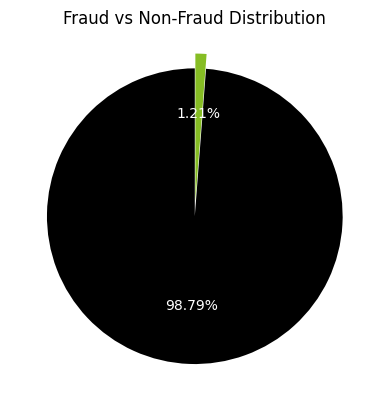

In [20]:
fraud_counts.plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=90,
    colors=['black', '#86bd24'],
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    explode=(0, 0.1)  
)
plt.gca().set_ylabel("")  
for text in plt.gca().texts:
    text.set_color("white")
plt.title("Fraud vs Non-Fraud Distribution")
plt.ylabel("")  
plt.savefig("Target Distribution.png", dpi=300, bbox_inches="tight")

plt.show()


### OverSampling - SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE - Training set fraud counts:\n", y_train_resampled.value_counts())

After SMOTE - Training set fraud counts:
 fraud
0    411210
1    411210
Name: count, dtype: int64


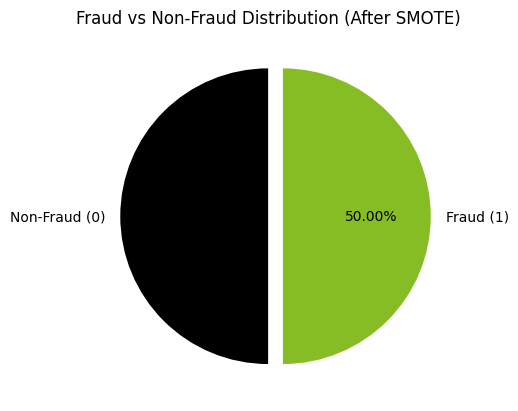

In [22]:
# Counting classes after SMOTE
fraud_counts_resampled = pd.Series(y_train_resampled).value_counts()

# pie chart
fraud_counts_resampled.plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=90,
    colors=['black', '#86bd24'],
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    explode=(0, 0.1)  # highlight fraud slice
)

plt.title("Fraud vs Non-Fraud Distribution (After SMOTE)")
plt.savefig("After SMOTE.png", dpi=300, bbox_inches="tight")
plt.ylabel("")  # removes default y-axis label
plt.show()


In [23]:
y_test.value_counts()

fraud
0    176233
1      2160
Name: count, dtype: int64

### XGboost

In [24]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1  # already balanced with SMOTE
)

model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[172002   4231]
 [    68   2092]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.976     0.988    176233
           1      0.331     0.969     0.493      2160

    accuracy                          0.976    178393
   macro avg      0.665     0.972     0.740    178393
weighted avg      0.992     0.976     0.982    178393


ROC-AUC Score: 0.9973982255393795


### Precision & Recall Threshold Tuning

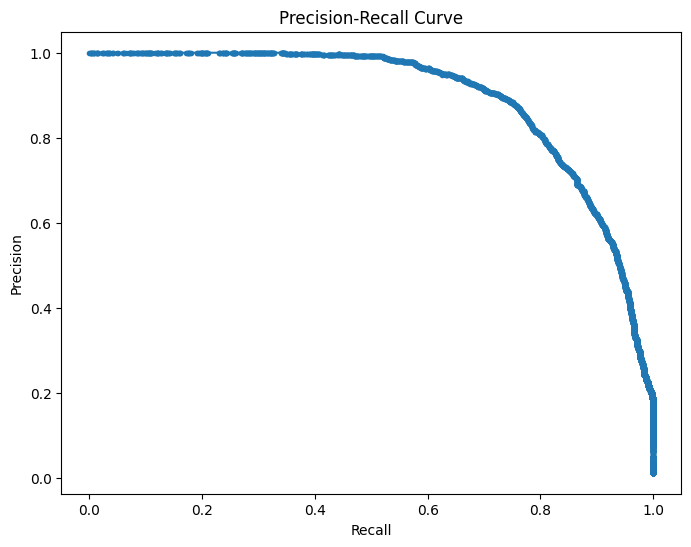

In [26]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [27]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.91, 0.1)

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"Threshold={t:.1f} | Precision={precision:.3f} | Recall={recall:.3f} | F1={f1:.3f}")


Threshold=0.1 | Precision=0.207 | Recall=0.995 | F1=0.342
Threshold=0.2 | Precision=0.226 | Recall=0.990 | F1=0.368
Threshold=0.3 | Precision=0.258 | Recall=0.983 | F1=0.408
Threshold=0.4 | Precision=0.294 | Recall=0.976 | F1=0.452
Threshold=0.5 | Precision=0.331 | Recall=0.969 | F1=0.493
Threshold=0.6 | Precision=0.385 | Recall=0.962 | F1=0.550
Threshold=0.7 | Precision=0.449 | Recall=0.951 | F1=0.610
Threshold=0.8 | Precision=0.525 | Recall=0.935 | F1=0.672
Threshold=0.9 | Precision=0.626 | Recall=0.894 | F1=0.737


In [28]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model.predict_proba(X_test)[:,1]

# Trying threshold = 0.7
threshold = 0.7
y_pred_threshold = (y_proba >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold, digits=3))


[[173709   2524]
 [   106   2054]]
              precision    recall  f1-score   support

           0      0.999     0.986     0.992    176233
           1      0.449     0.951     0.610      2160

    accuracy                          0.985    178393
   macro avg      0.724     0.968     0.801    178393
weighted avg      0.993     0.985     0.988    178393



### Feature Importance XGboost Top 15 Featrue

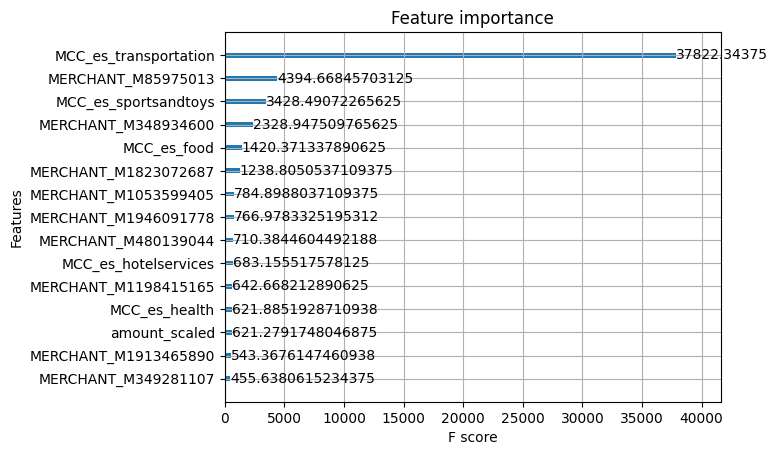

In [29]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, importance_type='gain', max_num_features=15)
plt.savefig("Top 15.png", dpi=300, bbox_inches="tight")

plt.show()

In [30]:
# Keeping only important features from feature importance
important_features = [
    "MCC_es_transportation",
    "MERCHANT_M85975013",
    "MCC_es_sportsandtoys",
    "MERCHANT_M348934600",
    "MCC_es_food",
    "MERCHANT_M1823072687",
    "MERCHANT_M1053599405",
    "MERCHANT_M1946091778",
    "MERCHANT_M480139044",
    "MCC_es_hotelservices",
    "MERCHANT_M1198415165",
    "MCC_es_health",
    "amount_scaled",
    "MERCHANT_M1913465890",
    "MERCHANT_M349281107"
]

X_selected = df[important_features]
y_selected = df["fraud"]

# Train/test split
from sklearn.model_selection import train_test_split
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.3, random_state=42, stratify=y_selected
)

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(y_train_selected.value_counts()[0] / y_train_selected.value_counts()[1])  # imbalance handling
)


xgb.fit(X_train_selected, y_train_selected)


y_pred_selected = xgb.predict(X_test_selected)
y_prob_selected = xgb.predict_proba(X_test_selected)[:,1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test_selected, y_pred_selected))
print(classification_report(y_test_selected, y_pred_selected))
print("ROC-AUC:", roc_auc_score(y_test_selected, y_prob_selected))




Confusion Matrix:
 [[168763   7470]
 [    60   2100]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    176233
           1       0.22      0.97      0.36      2160

    accuracy                           0.96    178393
   macro avg       0.61      0.96      0.67    178393
weighted avg       0.99      0.96      0.97    178393

ROC-AUC: 0.9953499021497424
